# **Mental Health Prediction for Kenyan university students**

##### **Authors**:
<ul type='square'> 
    <li> Alice Wamuyu</li>
    <li> Eugene Kuloba </li>
    <li> Fridah Kimathi </li>
    <li> Karen Amanya  </li>
    <li> Nicholus Magak  </li>
    <li> Nobert Akwir </li>
</ul>

#  **1. Business Understanding**

<img src="Images/mental-health.jpg" alt="My Image" width="700" height="400">

#### **What is mental health ?**

Mental health encompasses emotional, physiological and social well being. It affects how we feel, think, interact with others, handle stress and how we make choices.Good mental health is when a person is aware and utilizes his/her ability to deal with normal day to day life challenges whether at school , work and is productive in what they find fulfilling in life.Bad mental health is when a person finds it difficult to cope with how they are feeling, thinking or reacting to things and this can feel just as bad or even worse than physical illness.
Mental health problems range from common problems such as anxiety and depression to rarer problems such as schizophrenia and bipolar disorder.Many factors contribute to mental health problems, including:

  1. Biological factors, such as genes or brain chemistry
  2. Life experiences, such as trauma or abuse
  3. Family history of mental health problems

#### **Why is mental health important**
Mental health influences a variety of outcomes for an individual all the way to a nation. Healthier lifestyles, better physical health, fewer limitations in daily living, higher education, greater productivity in academics, employment and earnings, better relationships with others their overall quality of life are all influenced by positive mental health. Mental health problems are a common human experience and it's likely that,with a good combination of self-care, treatment and support that works for an individual they will get better.


## **Problem Statement**
<p>Despite resources in Kenyan universities growing immensely over the years, development of support services to students has not.Research has shown high levels of mental health problems among university students specifically depression and anxiety with the most affected group being students from poor backgrounds. The lack of or little provision for support services for such students results in dropouts and their inability to reach their full potential. </p>
<p>The Africa Mental Health Foundation is an NGO that aims at conducting mental health research to get findings that aid in developing innovative practices for providing mental health services in Africa. In 2023, they are partnering with the ministry of Education in Kenya to develop a chatbot that will be available to all university students in Kenya. The goal of this is to  reduce the stigma around seeking help by providing the students with a platform where they can openly input their feelings / thoughts and this will attempt to classify the particular problem they are facing and therefore provide fitting resources.</p>
<p>The use of technologies including machine learning and AI will potentially transform the delivery of mental health services in the coming years.This project aims to develop a machine learning model that classifies statements and questions expressed by university students in Kenya when speaking about the mental health challenges they struggle with and come up with a chatbot that will be used for a prototype of a mental health chatbot designed specifically for university students. </p>

## **Objectives**

> ### **General Objective**
The general objective is to leverage technology to make mental health services more accessible and more user-friendly for young people in Kenya and around the world.

> ### **Specific Objectives**
<ul type='square'>
    <li > To develop a machine learning model that classifies statements and questions expressed by university students in Kenya when speaking about the mental health challenges they struggle with </li>
    <li> To help universities establish mental health support and wellness services to their students. </li>
    <li> To help university students in Kenya that are facing mental health problems to find resources and support services  that will enable them to get better  </li>
</ul>


### **Importing the required libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_context('notebook')
import string
from textblob import TextBlob, Word
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  accuracy_score, classification_report, log_loss

# **2. Data Understanding**

The data used in this project is from the <a href="https://zindi.africa/competitions/basic-needs-basic-rights-kenya-tech4mentalhealth/data">  Basic Needs Basic Rights Kenya - Tech4MentalHealth</a> competition hosted by Zindi Africa. The data consists of statements and questions expressed by students from multiple universities across Kenya who reported suffering from these different mental health challenges. The wording of the statements is intended to respond to the prompting question, “What is on your mind?”

#### **Loading the data**

In [2]:
train_df = pd.read_csv('Data/Train.csv')
validation_df = pd.read_csv('Data/Test.csv')

In [3]:
# shape of the datasets
print(f'The train data shape: {train_df.shape}')
print(f'The test data shape: {validation_df.shape}')

The train data shape: (616, 3)
The test data shape: (309, 2)


In [4]:
# the columns in the datasets
print(f'The train data columns: \n {train_df.columns} \n')
print(f'The test data columns: \n {validation_df.columns}')

The train data columns: 
 Index(['ID', 'text', 'label'], dtype='object') 

The test data columns: 
 Index(['ID', 'text'], dtype='object')


In [5]:
# Checking for the shape, column names and data types 
print(f'The train data info: {train_df.info()} \n \n')
print(f'The test data info: {validation_df.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      616 non-null    object
 1   text    616 non-null    object
 2   label   616 non-null    object
dtypes: object(3)
memory usage: 14.6+ KB
The train data info: None 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      309 non-null    object
 1   text    309 non-null    object
dtypes: object(2)
memory usage: 5.0+ KB
The test data info: None


In [6]:
# classes proportionality 
train_df['label'].value_counts(normalize=True)

    # There is a slight class imbalance.

Depression    0.571429
Alcohol       0.227273
Suicide       0.107143
Drugs         0.094156
Name: label, dtype: float64

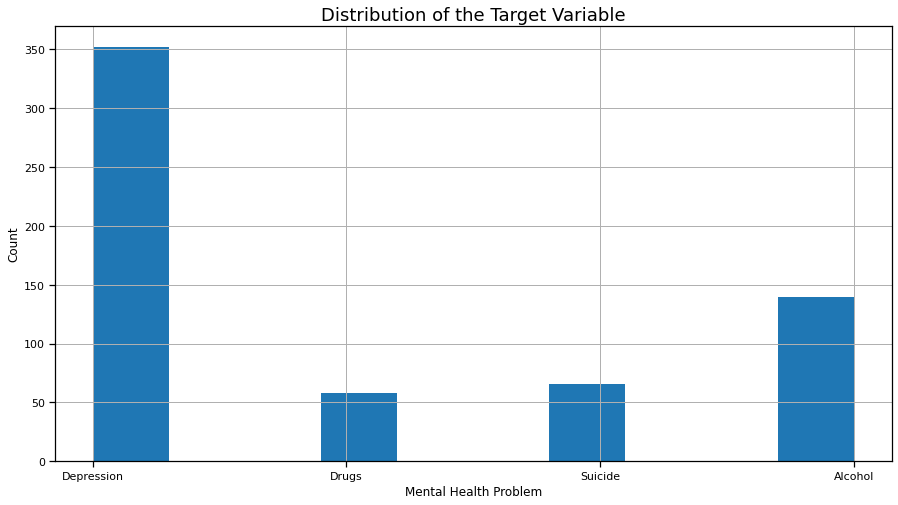

In [7]:
# Visualizing the proportionality of the target
plt.title('Distribution of the Target Variable', fontsize = 18)
plt.xlabel('Mental Health Problem')
plt.ylabel('Count')
train_df['label'].hist(figsize=(15,8));

In [8]:
# Creating a new column length showing the length of test per column
train_df['length'] =  train_df['text'].apply(len)
train_df['length']

0      39
1      28
2      57
3      22
4      51
       ..
611    36
612    30
613    24
614    16
615    31
Name: length, Length: 616, dtype: int64

In [9]:
# Statistical summary of the dataframe 
train_df.describe()

# The smallest statement is 8 words long
# The biggest statement is 196 words long

,length
count,616.000000
mean,39.813312
std,21.438797
min,8.000000
25%,26.000000
50%,35.000000
75%,48.250000
max,196.000000


In [10]:
# Viewing the statement with the most words
train_df[train_df['length'] == 196]

,ID,text,label,length
194,J55053XP,I am financially constrained over school fees ...,Depression,196


In [11]:
# Viewing the statement with the most words
print(train_df['text'].iloc[194])

I am financially constrained over school fees and my  family background is not stable with a lot of debts…I have an elderly brother who could easily support me but has no job even after graduating


 #### **Visualizing the distribution of the number of words per text**

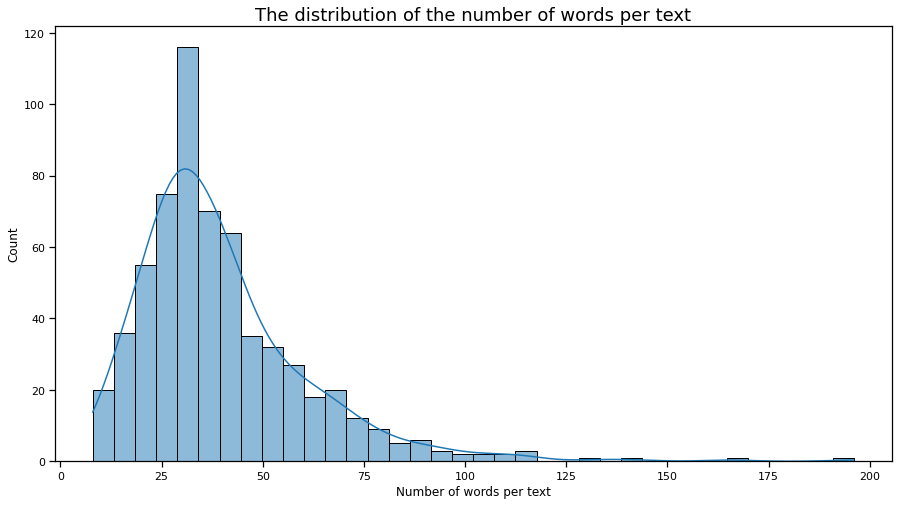

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(train_df['length'],ax=ax, kde=True)
ax.set_ylabel("Count")
ax.set_xlabel("Number of words per text")
ax.set_title("The distribution of the number of words per text", fontsize = 18);

# Observations:
    # The average text length lies between 25 and 40 words

 #### **Visualizing the effect of the number of words per text to the mental health status**

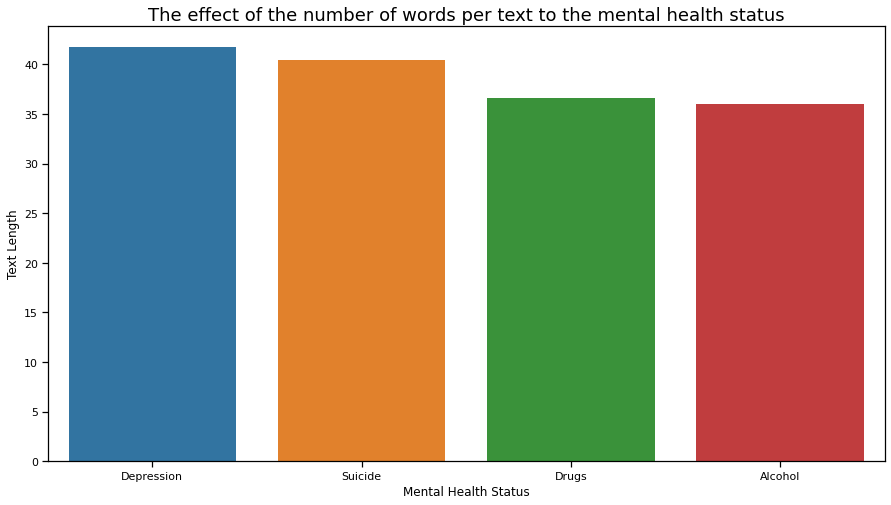

In [13]:
avg_text_length = train_df.groupby("label").mean().sort_values(by='length', ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=avg_text_length.index,y=avg_text_length.length, ax=ax)
ax.set_ylabel("Text Length")
ax.set_xlabel("Mental Health Status")
ax.set_title("The effect of the number of words per text to the mental health status", fontsize = 18);

# Observations:
    #Depression has the highest number of words per text on average followed closely by Suicide.
    # Alcohol and drugs have almost the same number of words per text which makes sense since alcohol is also a type of a drug.

# **3. Data Preparation**

 #### **i. Correcting spelling mistakes**

In [14]:
## To install textblob : conda install -c conda-forge textblob in terminal

def correct_sent(text):
    correction = TextBlob(text)
    correction = correction.correct()
    return str(correction)

train_df['corrected_sent'] = train_df['text'].apply(lambda x: correct_sent(x))
validation_df['corrected_sent'] = validation_df['text'].apply(lambda x: correct_sent(x))
train_df.head()

,ID,text,label,length,corrected_sent
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression,39,I feel that it was better I die happy
1,9JDAGUV3,Why do I get hallucinations?,Drugs,28,Why do I get hallucinations?
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression,57,I am stressed due to lack of financial support...
3,6UY7DX6Q,Why is life important?,Suicide,22,Why is life important?
4,FYC0FTFB,How could I be helped to go through the depres...,Depression,51,Now could I be helped to go through the depres...


 #### **ii. Changing text to lowercase**

In [15]:
train_df['corrected_sent'] = train_df['corrected_sent'].apply(lambda x: x.lower())
validation_df['corrected_sent'] = validation_df['corrected_sent'].apply(lambda x: x.lower())
train_df.head()

,ID,text,label,length,corrected_sent
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression,39,i feel that it was better i die happy
1,9JDAGUV3,Why do I get hallucinations?,Drugs,28,why do i get hallucinations?
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression,57,i am stressed due to lack of financial support...
3,6UY7DX6Q,Why is life important?,Suicide,22,why is life important?
4,FYC0FTFB,How could I be helped to go through the depres...,Depression,51,now could i be helped to go through the depres...


 #### **iii. Removing the punctuation marks**

In [16]:
# Checking texts with special characters such as â€¦ represented as …

for x in train_df['corrected_sent']:
    if '…' in x:
        print(x)

i feel hopeless, unworthy and useless …now do i cope with stress and forge the past?
i am facing a lot of challenges in life financially, emotional, psycologically and with no solutions…now can i safely look for solutions about depression on goose
there i get money for my needs…there do i get money  for personal needs?
i am financially constrained over school fees and my  family background is not stable with a lot of debts…i have an elderly brother who could easily support me but has no job even after granulating
i feel desperate…why is the world so unfair
by relatives deny me…i wonder if i am part of my family?


In [17]:
# Removing special characters â€¦ represented as …

train_df['corrected_sent'] = train_df['corrected_sent'].apply(lambda x: x.replace('…', ' '))
validation_df['corrected_sent'] = validation_df['corrected_sent'].apply(lambda x: x.replace('…', ' '))

In [18]:
# removing the other standard punctuation marks

train_df['corrected_sent'] = train_df['corrected_sent'].apply(lambda x: x.strip(string.punctuation))
validation_df['corrected_sent'] = validation_df['corrected_sent'].apply(lambda x: x.strip(string.punctuation))

train_df.head()

,ID,text,label,length,corrected_sent
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression,39,i feel that it was better i die happy
1,9JDAGUV3,Why do I get hallucinations?,Drugs,28,why do i get hallucinations
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression,57,i am stressed due to lack of financial support...
3,6UY7DX6Q,Why is life important?,Suicide,22,why is life important
4,FYC0FTFB,How could I be helped to go through the depres...,Depression,51,now could i be helped to go through the depres...


 #### **iv. removing stop words**

In [19]:
# Downloading the necessary nltk packages. Uncomment to download

#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('punkt')
#nltk.download('stopwords')

In [20]:
stopwords = nltk.corpus.stopwords.words('english')
wordnet_lemmatizer = WordNetLemmatizer()

def remove_stopwords(x):
    sent = [wordnet_lemmatizer.lemmatize(i, 'v') for i in x.split() if i not in stopwords]
    return ' '.join(sent)

train_df['no_stopwords'] = train_df['corrected_sent'].apply(lambda x: remove_stopwords(x))
validation_df['no_stopwords'] = validation_df['corrected_sent'].apply(lambda x: remove_stopwords(x))
train_df.head()

,ID,text,label,length,corrected_sent,no_stopwords
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression,39,i feel that it was better i die happy,feel better die happy
1,9JDAGUV3,Why do I get hallucinations?,Drugs,28,why do i get hallucinations,get hallucinations
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression,57,i am stressed due to lack of financial support...,stress due lack financial support school
3,6UY7DX6Q,Why is life important?,Suicide,22,why is life important,life important
4,FYC0FTFB,How could I be helped to go through the depres...,Depression,51,now could i be helped to go through the depres...,could help go depression


#### **iv. Performing train test split**

In [21]:
train_label = train_df['label']
train_label

0      Depression
1           Drugs
2      Depression
3         Suicide
4      Depression
          ...    
611       Alcohol
612       Suicide
613       Alcohol
614    Depression
615    Depression
Name: label, Length: 616, dtype: object

In [22]:
#Encoding the train data
target={'Depression':0, 'Alcohol':1, 'Suicide':2, 'Drugs':3}

train_label = train_label.map(target)
train_label

0      0
1      3
2      0
3      2
4      0
      ..
611    1
612    2
613    1
614    0
615    0
Name: label, Length: 616, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train_df, train_label, test_size=0.2 , random_state=42)


 #### **v. Vectorization**

In [24]:
# Instantiate countvectorizer
countvec = CountVectorizer(ngram_range=(1,1))
countvec1 = CountVectorizer(ngram_range=(1,1))

# Vectorization of the data
count_train_data = countvec.fit_transform(X_train.no_stopwords)
count_test_data = countvec.transform(X_test.no_stopwords)

count_training_data = countvec1.fit_transform(train_df.no_stopwords)
count_validation_data = countvec1.transform(validation_df.no_stopwords)


X_train= pd.DataFrame(count_train_data.toarray(), columns=countvec.get_feature_names())
X_test  = pd.DataFrame(count_test_data.toarray(), columns=countvec.get_feature_names())

train_data= pd.DataFrame(count_training_data.toarray(), columns=countvec1.get_feature_names())
validation_data= pd.DataFrame(count_validation_data.toarray(), columns=countvec1.get_feature_names())

X_train.head(3)

,abandon,able,absent,abuse,academic,add,addict,addition,adduct,adults,...,world,worry,worst,worth,worthless,would,wrap,yet,young,youths
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **3. Modelling**

In [25]:
#Models to be tested
models = { 'Model' : ['Baseline Decision Tree', 'Baseline KNN Classifier', 'Baseline Random Forest Classifier',\
                      'Baseline Adaboost Classifier', 'Baseline Gradient Boost', 'baseline XGBoost Classifier',\
                        'XGBoost Classifier-Grid Search'],
          'Train Accuracy Score(%)': [0, 0, 0, 0, 0, 0, 0],
          'Test Accuracy Score(%)': [0, 0, 0, 0, 0, 0, 0],
          'Train Log_loss': [0, 0, 0, 0, 0, 0, 0],
          'Test Log_loss': [0, 0, 0, 0, 0, 0, 0] }
          

#Dataframe holding the model names and accuracy score and log_loss score
df_model_results = pd.DataFrame(models, columns=['Model','Train Accuracy Score(%)', 'Test Accuracy Score(%)', 'Train Log_loss', 'Test Log_loss'])


#Function to fill the dataframe holding model names and accuracy score

def model_results(model_type, y_train, y_train_pred, y_train_pred_prob, y_test, y_test_pred, y_test_pred_prob):
  index_val = df_model_results[df_model_results['Model']==model_type].index

  df_model_results.loc[index_val, 'Train Accuracy Score(%)'] = round(accuracy_score(y_train, y_train_pred), 2)*100
  df_model_results.loc[index_val, 'Test Accuracy Score(%)'] = round(accuracy_score(y_test, y_test_pred), 2)*100
  df_model_results.loc[index_val, 'Train Log_loss'] = log_loss(y_train, y_train_pred_prob, labels=[0,1,2,3])
  df_model_results.loc[index_val, 'Test Log_loss'] = log_loss(y_test, y_test_pred_prob, labels=[0,1,2,3])

  return df_model_results

In [26]:
# Function to run all the baseline models:
def baseline_models(model, model_name):
    model.fit(X_train, y_train)

    y_test_pred_prob = model.predict_proba(X_test)
    y_train_pred_prob = model.predict_proba(X_train)

    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print('*********************************************************************')
    print(classification_report(y_test, y_test_pred ))

    print('*********************************************************************')
    return model_results(model_name,y_train, y_train_pred, y_train_pred_prob, y_test, y_test_pred, y_test_pred_prob)


>> <b>i. Decision Tree Classifier</b>

In [27]:
baseline_dt = DecisionTreeClassifier(random_state=100)
baseline_models(baseline_dt, 'Baseline Decision Tree')

#Observation:
     # Despite the fact that suicide has more data than drugs, it performs worse than it
     # There is overfitting 

*********************************************************************
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        63
           1       0.84      0.93      0.88        28
           2       0.62      0.50      0.55        16
           3       1.00      0.71      0.83        17

    accuracy                           0.83       124
   macro avg       0.82      0.76      0.78       124
weighted avg       0.83      0.83      0.83       124

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%),Train Log_loss,Test Log_loss
0,Baseline Decision Tree,99.0,83.0,0.012334,5.59081
1,Baseline KNN Classifier,0.0,0.0,0.000000,0.00000
2,Baseline Random Forest Classifier,0.0,0.0,0.000000,0.00000
3,Baseline Adaboost Classifier,0.0,0.0,0.000000,0.00000
4,Baseline Gradient Boost,0.0,0.0,0.000000,0.00000
5,baseline XGBoost Classifier,0.0,0.0,0.000000,0.00000
6,XGBoost Classifier-Grid Search,0.0,0.0,0.000000,0.00000


>> <b>ii. KNN Classifier</b>

In [28]:
baseline_knn_pipe = Pipeline(steps=[('sc', StandardScaler()), ('knn', KNeighborsClassifier())])
baseline_models(baseline_knn_pipe, 'Baseline KNN Classifier')
# Observation
 # KNN performs worse than decision tree

*********************************************************************
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        63
           1       0.63      0.86      0.73        28
           2       0.50      0.06      0.11        16
           3       0.83      0.29      0.43        17

    accuracy                           0.70       124
   macro avg       0.67      0.53      0.52       124
weighted avg       0.69      0.70      0.65       124

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%),Train Log_loss,Test Log_loss
0,Baseline Decision Tree,99.0,83.0,0.012334,5.590810
1,Baseline KNN Classifier,82.0,70.0,0.512985,2.842548
2,Baseline Random Forest Classifier,0.0,0.0,0.000000,0.000000
3,Baseline Adaboost Classifier,0.0,0.0,0.000000,0.000000
4,Baseline Gradient Boost,0.0,0.0,0.000000,0.000000
5,baseline XGBoost Classifier,0.0,0.0,0.000000,0.000000
6,XGBoost Classifier-Grid Search,0.0,0.0,0.000000,0.000000


>> <b>iii. Random Forest Classifier</b>

In [29]:
baseline_rf = RandomForestClassifier(random_state=0)
baseline_models(baseline_rf, 'Baseline Random Forest Classifier')

# Observation 
 # Random Forest performs better than Decision Tree and KNN

*********************************************************************
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        63
           1       0.76      0.89      0.82        28
           2       0.75      0.38      0.50        16
           3       0.92      0.65      0.76        17

    accuracy                           0.81       124
   macro avg       0.81      0.71      0.74       124
weighted avg       0.82      0.81      0.80       124

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%),Train Log_loss,Test Log_loss
0,Baseline Decision Tree,99.0,83.0,0.012334,5.590810
1,Baseline KNN Classifier,82.0,70.0,0.512985,2.842548
2,Baseline Random Forest Classifier,99.0,81.0,0.106574,0.775972
3,Baseline Adaboost Classifier,0.0,0.0,0.000000,0.000000
4,Baseline Gradient Boost,0.0,0.0,0.000000,0.000000
5,baseline XGBoost Classifier,0.0,0.0,0.000000,0.000000
6,XGBoost Classifier-Grid Search,0.0,0.0,0.000000,0.000000


>> <b>iv. Adaboost Classifier</b>

In [30]:
baseline_adaboost = AdaBoostClassifier(random_state=0)
baseline_models(baseline_adaboost, 'Baseline Adaboost Classifier')

# Observations:
 # Adaboost performs worse than all the previous models
 # There is overfitting


*********************************************************************
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        63
           1       0.92      0.79      0.85        28
           2       0.67      0.25      0.36        16
           3       0.69      0.53      0.60        17

    accuracy                           0.77       124
   macro avg       0.75      0.63      0.66       124
weighted avg       0.76      0.77      0.74       124

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%),Train Log_loss,Test Log_loss
0,Baseline Decision Tree,99.0,83.0,0.012334,5.590810
1,Baseline KNN Classifier,82.0,70.0,0.512985,2.842548
2,Baseline Random Forest Classifier,99.0,81.0,0.106574,0.775972
3,Baseline Adaboost Classifier,85.0,77.0,1.031080,1.059045
4,Baseline Gradient Boost,0.0,0.0,0.000000,0.000000
5,baseline XGBoost Classifier,0.0,0.0,0.000000,0.000000
6,XGBoost Classifier-Grid Search,0.0,0.0,0.000000,0.000000


>> <b>v. Gradient Boost Classifier</b>

In [31]:
baseline_gradientboost = GradientBoostingClassifier(random_state=0)
baseline_models(baseline_gradientboost, 'Baseline Gradient Boost')

*********************************************************************
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        63
           1       0.89      0.89      0.89        28
           2       0.58      0.44      0.50        16
           3       1.00      0.71      0.83        17

    accuracy                           0.83       124
   macro avg       0.82      0.74      0.77       124
weighted avg       0.83      0.83      0.82       124

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%),Train Log_loss,Test Log_loss
0,Baseline Decision Tree,99.0,83.0,0.012334,5.590810
1,Baseline KNN Classifier,82.0,70.0,0.512985,2.842548
2,Baseline Random Forest Classifier,99.0,81.0,0.106574,0.775972
3,Baseline Adaboost Classifier,85.0,77.0,1.031080,1.059045
4,Baseline Gradient Boost,97.0,83.0,0.163581,0.509805
5,baseline XGBoost Classifier,0.0,0.0,0.000000,0.000000
6,XGBoost Classifier-Grid Search,0.0,0.0,0.000000,0.000000


>> <b>vi. XGBoost Classifier</b>

In [32]:
xgboost_classifier = XGBClassifier()
baseline_models(xgboost_classifier, 'baseline XGBoost Classifier')

*********************************************************************
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        63
           1       0.89      0.89      0.89        28
           2       0.71      0.62      0.67        16
           3       1.00      0.65      0.79        17

    accuracy                           0.85       124
   macro avg       0.86      0.78      0.81       124
weighted avg       0.85      0.85      0.84       124

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%),Train Log_loss,Test Log_loss
0,Baseline Decision Tree,99.0,83.0,0.012334,5.590810
1,Baseline KNN Classifier,82.0,70.0,0.512985,2.842548
2,Baseline Random Forest Classifier,99.0,81.0,0.106574,0.775972
3,Baseline Adaboost Classifier,85.0,77.0,1.031080,1.059045
4,Baseline Gradient Boost,97.0,83.0,0.163581,0.509805
5,baseline XGBoost Classifier,93.0,85.0,0.219129,0.451154
6,XGBoost Classifier-Grid Search,0.0,0.0,0.000000,0.000000


>> <b> Tuning XGboost model</b>

In [33]:
Tuned_xgboost = XGBClassifier()
param_grid = {'learning_rate': [0.1,0.2],
               'max_depth': [4, 6, 10],
               'n_estimators':[200, 300, 400]}


xgbclassifier_grid_search = GridSearchCV(Tuned_xgboost, param_grid, scoring='accuracy', cv=3, n_jobs=1)

xgbclassifier_grid_search.fit(X_train, y_train)

y_test_pred_prob = xgbclassifier_grid_search.predict_proba(X_test)
y_train_pred_prob = xgbclassifier_grid_search.predict_proba(X_train)

y_test_pred = xgbclassifier_grid_search.predict(X_test)
y_train_pred = xgbclassifier_grid_search.predict(X_train)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred ))

print('*********************************************************************')
model_results('XGBoost Classifier-Grid Search',y_train, y_train_pred, y_train_pred_prob, y_test, y_test_pred, y_test_pred_prob)

*********************************************************************
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        63
           1       0.86      0.89      0.88        28
           2       0.71      0.62      0.67        16
           3       1.00      0.65      0.79        17

    accuracy                           0.85       124
   macro avg       0.85      0.78      0.80       124
weighted avg       0.85      0.85      0.84       124

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%),Train Log_loss,Test Log_loss
0,Baseline Decision Tree,99.0,83.0,0.012334,5.590810
1,Baseline KNN Classifier,82.0,70.0,0.512985,2.842548
2,Baseline Random Forest Classifier,99.0,81.0,0.106574,0.775972
3,Baseline Adaboost Classifier,85.0,77.0,1.031080,1.059045
4,Baseline Gradient Boost,97.0,83.0,0.163581,0.509805
5,baseline XGBoost Classifier,93.0,85.0,0.219129,0.451154
6,XGBoost Classifier-Grid Search,92.0,85.0,0.241682,0.439006


In [34]:
# XGBoost Best Parameters
xgbclassifier_grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}

# Final Model

<i>The chosen  final model is the XGBoost Classifier</i>

In [35]:
final_model = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=300)
 
final_model.fit(train_data, train_label)

preds = final_model.predict_proba(validation_data)


In [36]:

id = pd.DataFrame(validation_df['ID'])
predicted = pd.DataFrame(preds, columns=['Depression', 'Alcohol', 'Suicide', 'Drugs'])
predicted_status = pd.concat([id,predicted], axis=1)

#Saving file as a CSV
predicted_status.to_csv('Data/predicted_status.csv',encoding='utf-8',sep=',', index=False)

# **4. Evaluation**

Based on the accuracy of our best model, the XGBoost Classifier-Grid Search, had a train accuracy score of 92% and test accuracy of 85%. The same model had a train and test log score of 0.242 and 0.439, respectively. We chose to use log loss as a performance metric because it takes into account the probabilities underlying in the model, not only the final output of the classification. This means, the higher the probabilities the lower the log loss value, which is better because it is basically a measure of uncertainty and the lower it is, the more certain we are of the potential occurrence. 

Since XGBoost classifier had the lowest log loss score, and it was chosen to be the best model, even though we had prior models with high training and test data accuracy.

#### **_Findings_**:
1. The dataset featured more observations of Depression and Anxiety than other classifications as a result the models used had lower recall and f1 scores in the classification of Drug and Alcohol related problems
2. All models performed fairly well in classifying mental health problems in both the training and testing sets although accuracy was higher on the training data.


#### **_Limitations_**: 
i. Due to the imbalance in the dataset the F1-score for drug and alcohol was notably lower than depression and suicide.

ii. Due to a relatively small dataset we could not achieve high score as desired.

# **Conclusion and recommendations**

The final model performed fairly well with a log score of 0.52 and an accuracy of around 85%. The Africa Mental Health Foundation(AMHF) can integrate the model into a chatbot prototype to carry out tests on actual university students and predict the student's mental state in order to assist them accordingly. This will help correctly identify and classify mental health problems to match students with the suitable resources. Moreover, the developed chatbot will encourage more students to  openly seek help without the fear of stigmatization.


#### **_Recommendations_**
From our model's ability to accurately identify and classify mental health problems at least 85% of the time. We would recommend that:

1. The Africa Mental Health Foundation(AMHF) should collect more data that features drug and alcohol related problems as well as other mental health problems that have not been featured in the observations used here.

2. The model be integrated into the chatbot prototype to carry out tests on actual university students and collect data on how it performed in classifying problems they were facing.

3. The chatbot should also feature a database containing resources and services available to the students based on the problem that the model was able to identify. This will ensure that actual help is availed to the user.